가공경화 없이 strain-rate sensitivity만을 고려한 inhomogeneity evolution

In [1]:
%pylab inline
exp=np.exp

Populating the interactive namespace from numpy and matplotlib


In [2]:
def F(f0,m,ea,eb):
    return f0**(1./m)*(exp(-ea/m)-1.)-(exp(-eb/m)-1.)
def Fprime(m,eb):
    return 1./m*exp(-eb/m)
def nr(f0,m,guess,ea):
    eb=guess
    
    tol=1e-10
    f=F(f0,m,ea,eb)
    
    nit=0
    while(abs(f)>tol):
        nit=nit+1 
        f=F(f0,m,ea,eb)
        eb=eb-f/Fprime(m,eb)
        # print 'eb:',eb, 'F:',F(f0,m,ea,eb)
        if (nit>10): return np.nan
        
    return eb

In [3]:
def xy_curve(f0,m):
    EA=np.linspace(0.0,.5)
    
    eb=[]
    for i in xrange(len(EA)):
        if i==0: guess=EA[i]
        else: guess=eb[i-1]+0.001
        eb.append(nr(f0,m,guess,EA[i]))
    return EA,np.array(eb)

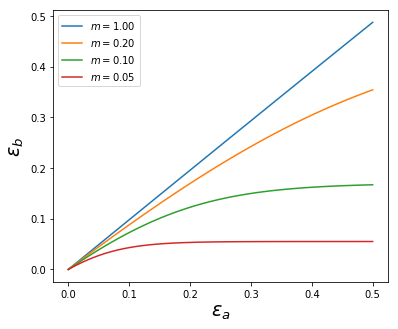

In [4]:
f0s=[0.98]#,0.99]
ms=[1,0.2,0.1,0.05]

fig=plt.figure(figsize=(6,5))
ax=fig.add_subplot(111)
for i in xrange(len(f0s)):
    for j in xrange(len(ms)):
        x,y=xy_curve(f0s[i],ms[j])
        ax.plot(x,y,label=r'$m=%.2f$'%ms[j])
        
ax.legend()
ax.set_xlabel(r'$\varepsilon_a$',fontsize=19)
ax.set_ylabel(r'$\varepsilon_b$',fontsize=19)

In [5]:
def eb_star(m,f):
    return -m * np.log(1-f**(1/m))

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in divide
  


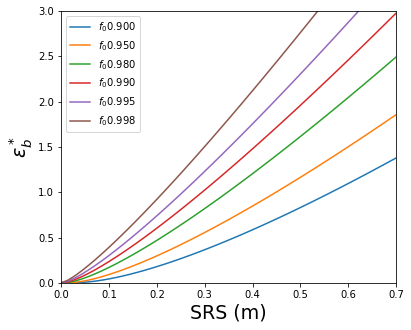

In [6]:
fs=[0.9,0.95,0.98,0.99,0.995,0.998]
m=np.linspace(0,0.7)
fig=plt.figure(figsize=(6,5));ax=fig.add_subplot(111)
for i in xrange(len(fs)):
    f0=fs[i]
    y=eb_star(m,f0)
    ax.plot(m,y,label=r'$f_0%.3f$'%f0)

ax.legend()
ax.set_ylim(0,3)
ax.set_xlim(0,0.7)

ax.set_xlabel(r'SRS (m)',fontsize=19)
ax.set_ylabel(r'$\varepsilon_b^*$',fontsize=19)

## Appendix

Check if $\varepsilon_b$ at $\varepsilon_a=3$ can approximate $\varepsilon_b^*$.

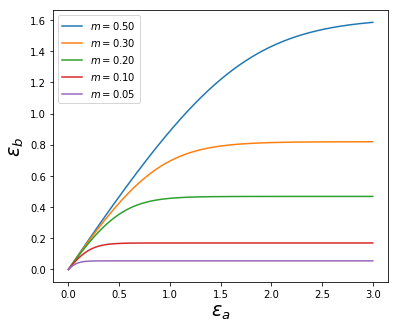

In [7]:
def xy_curve_ext(f0,m,final):
    EA=np.linspace(0.0,final,1000)
    
    eb=[]
    for i in xrange(len(EA)):
        if i==0: guess=EA[i]
        else: guess=eb[i-1]+0.001
        eb.append(nr(f0,m,guess,EA[i]))
    return EA,np.array(eb),eb[-1]

f0s=[0.98]#,0.99]
ms=[0.5,0.3,0.2,0.1,0.05]

fig=plt.figure(figsize=(6,5))
ax=fig.add_subplot(111)
eps_b_star_nu=[]
eps_b_star_an=[]
for i in xrange(len(f0s)):
    for j in xrange(len(ms)):
        x,y,eb_end=xy_curve_ext(f0s[i],ms[j],3.)
        ax.plot(x,y,label=r'$m=%.2f$'%ms[j])
        eps_b_star_nu.append(eb_end)
        
        eps_b_star_an.append(eb_star(ms[j],f=f0s[i])) ## analytical solution
            
        
ax.legend()
ax.set_xlabel(r'$\varepsilon_a$',fontsize=19)
ax.set_ylabel(r'$\varepsilon_b$',fontsize=19)

## Plot the result to see the accuracy of the approximated solution

(-0.02143808518926308, 1.6617840075494463)

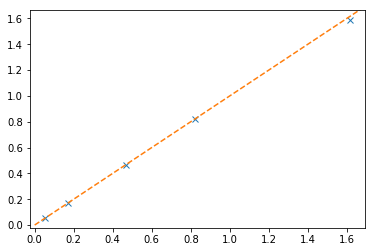

In [8]:
ax=gca()
ax.plot(eps_b_star_an,eps_b_star_nu,'x')
xl=ax.get_xlim()
yl=ax.get_ylim()
ax.plot([0,10],[0,10],'--')
ax.set_xlim(xl)
ax.set_ylim(yl)